# Analyzing the scraped data
When scraping data from the internet, we often need to do some "sanity checks" to make sure that the collected data is what we expect it to be, because in scraping we are exposed to connection problems, bans from the host, and errors caused by the differences between the HTML structures of different web pages.

In this notebook, you are asked to plot some graphs to explore the data that you have collected and find the problems in it, if any.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Exploring the downloaded HTML files

### Task 1.1
In this task, you have to plot the distribution of the file sizes of the HTML pages that you have downloaded. Usually, all pages will have a similar size. If you notice that you have a number of files with a significantly different size than the majority of the files, then it may be a good idea to check these files and explore the reason behind this difference. For example, in our code we are saving empty HTML files if we face an error while downloading the web pages. Therefore, seeing a number of files with size zero in the histogram indicates that we have some HTML pages that were not downloaded.

minimum file size is: 38829 bytes
maximum file size is: 55720 bytes


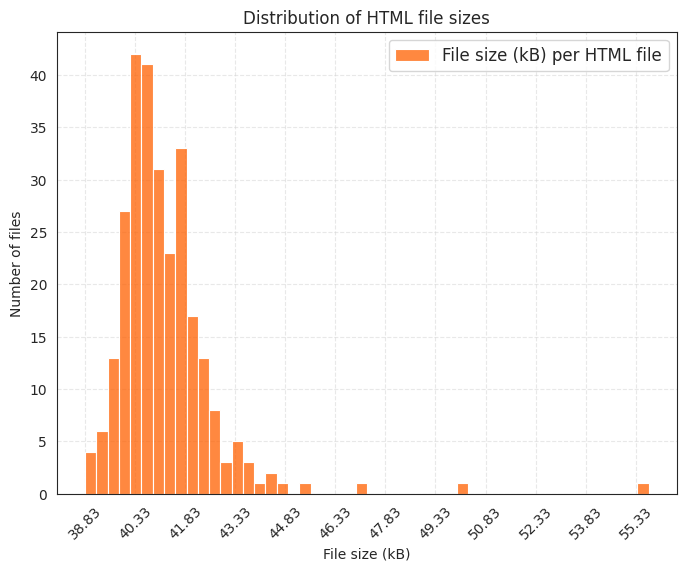

In [88]:
# Plot the distribution of the downloaded HTML file sizes
# WRITE YOUR CODE HERE
import seaborn as sns
import os

# Get the list of HTML files in the raw_html folder
html_files = os.listdir('data/raw_html')

# Create the figures folder
if not os.path.exists('figures'):
    os.mkdir('figures')

# Create a list of file sizes
file_sizes = []
for html_file in html_files:
    with open('data/raw_html/' + html_file, 'rb') as f:
        file_sizes.append(os.fstat(f.fileno()).st_size)

# turn everything into kilobytes
file_sizes_kb = list(map(lambda x: x / 1000, file_sizes))
print(f"minimum file size is: {min(file_sizes)} bytes\nmaximum file size is: {max(file_sizes)} bytes")


# white background style
sns.set_style('white')

fig, ax = plt.subplots(figsize=(8, 6))

# plot the histogram of file sizes as kB
sns.histplot(file_sizes_kb, bins=50, ax=ax, color='#FF6000')

plt.xlabel('File size (kB)')
plt.ylabel('Number of files')
plt.title('Distribution of HTML file sizes')
plt.legend(['File size (kB) per HTML file'], loc='upper right', prop={'size': 12})

# set the range of the x-axis
plt.xticks(np.arange(min(file_sizes_kb), max(file_sizes_kb) + 1, 1.5))
plt.xticks(rotation=45)

# create suitable grid lines
plt.grid(True)
ax.grid(True, linestyle='--', which='both', color='lightgrey', alpha=0.5)

# Save the final plot in figures/file_sizes.png using the code below
plt.savefig('figures/html_file_size.png')

### Task 1.2
Since the HTML file size is significantly affected by the images it contains, another way to explore the downloaded HTML files is by looking at the number of lines in each file. In this task, you need to plot a distribution of the number of lines in the downloaded HTML files.

minimum number of lines: 388         
maximum number of lines: 532


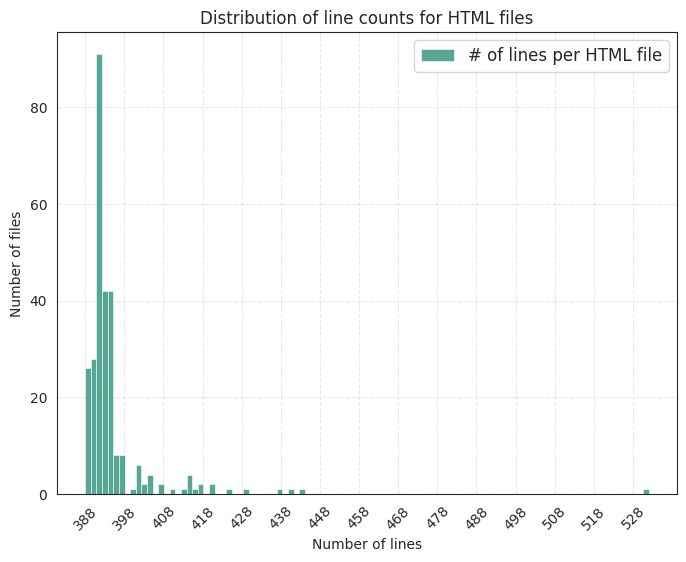

In [177]:
# Plot the distribution of line counts in the downloaded HTML files
# WRITE YOUR CODE HERE
# Create a list of line counts
line_counts = []
for html_file in html_files:
    with open('data/raw_html/' + html_file, 'r') as f:
        line_counts.append(len(f.readlines()))

print(f"minimum number of lines: {min(line_counts)} \
        \nmaximum number of lines: {max(line_counts)}")

sns.set_style('white')

fig, ax = plt.subplots(figsize=(8, 6))

# plot the histogram of file sizes as kB
sns.histplot(line_counts, bins=100, ax=ax, color='#1F8A70')
plt.xlabel('Number of lines')
plt.ylabel('Number of files')
plt.title('Distribution of line counts for HTML files')
plt.legend(['# of lines per HTML file'], loc='upper right', prop={'size': 12})

plt.xticks(np.arange(min(line_counts), max(line_counts) + 5, 10))
plt.xticks(rotation=45)

ax.grid(True, linestyle='--', which='both', color='lightgrey', alpha=0.5)

# Save the final plot in figures/html_line_count.png using the code below
plt.savefig('figures/html_line_count.png')

## 2. Exploring the processed data

### Task 2.1
The first thing to check is if we have extracted information from all of the collected links or not. In this task, you need to compare the number of links that you have collected (in link_list.txt) to the number of parsed data dictionaries (in parsed_data.jsons) that you have created by parsing the downloaded HTML files.

In [37]:
# Compute the number of links in link_list.txt
# WRITE YOUR CODE HERE
n_collected_links = 0

# Get the number of links in link_list.txt
with open('data/link_list.txt', 'r') as f:
    # first line of the collected links is not a valid line
    n_collected_links = len(f.readlines()) - 1

# Compute the number of the parsed data dictionaries in parsed_data.jsons
# WRITE YOUR CODE HERE
n_parsed_links = 0

# Get the number of lines in parsed_data.json
with open('data/parsed_data.jsons', 'r') as f:
    n_parsed_links = len(f.readlines())

print(f"Number of collected links: {n_collected_links}")
print(f"Number of parsed links: {n_parsed_links}")

Number of collected links: 277
Number of parsed links: 277


### Task 2.2
In this task, you need to plot the distribution of line counts in the text content that you extracted from the HTML web pages. This will help point out some errors in content extraction, if any.

minimum number of lines: 388         
maximum number of lines: 532


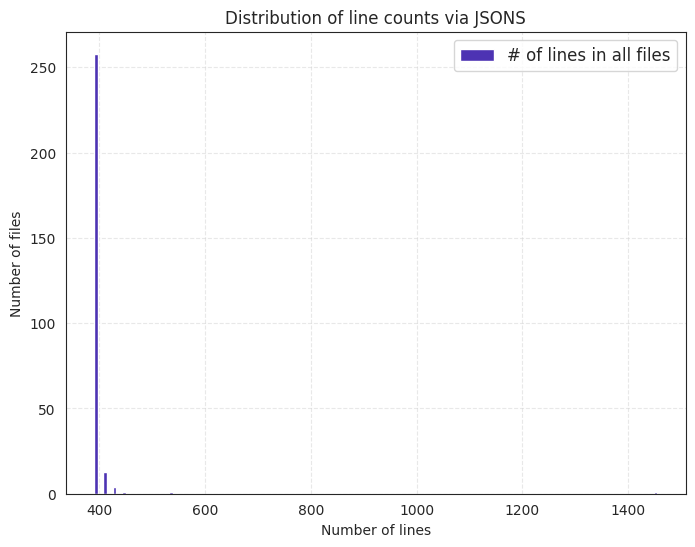

In [179]:
# Plot the distribution of line counts in the extracted text content
# WRITE YOUR CODE HERE
import json

html_files = os.listdir('data/raw_html')

# a list of line counts
line_counts = []
for html_file in html_files:
    with open('data/raw_html/' + html_file, 'r') as f:
        line_counts.append(len(f.readlines()))

with open('data/parsed_data.jsons', 'r') as f:
    lines = f.readlines()
count = 0

for line in lines:
    # parse the line as a JSON object and count the instances of '\n'
    obj = json.loads(line)
    content = obj['content']
    count += content.count('\n')

print(f"minimum number of lines: {min(line_counts)} \
        \nmaximum number of lines: {max(line_counts)}")

sns.set_style('white')
custom_color = (0.3, 0.2, 0.7)
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist([line_counts, count], bins=60, facecolor=custom_color)
plt.xlabel('Number of lines')
plt.ylabel('Number of files')
plt.title('Distribution of line counts via JSONS')
plt.legend(['# of lines in all files'], loc='upper right', prop={'size': 12})
ax.grid(True, linestyle='--', which='both', color='lightgrey', alpha=0.5)

# Save the final plot in figures/content_line_count.png using the code below
plt.savefig('figures/content_line_count.png')

### Task 2.3
In this task, you need to plot the distribution of the dates of the collected news articles.

Earliest date: 2019-01-11 10:28:42 and latest date: 2023-03-28 15:09:15
difference is: 51 months


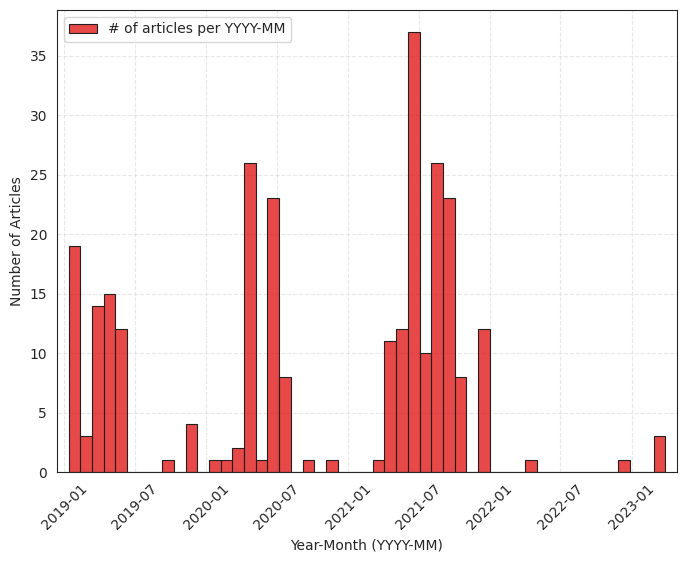

In [162]:
# Plot the distribution of dates from the extracted date information
# WRITE YOUR CODE HERE
import datetime

with open('data/parsed_data.jsons', 'r') as f:
    lines = f.readlines()

dates = []

for line in lines:
    obj = json.loads(line)
    date = obj['date']
    # Convert the date to a `datetime` object
    datetime_object = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    # Add the `datetime` object to the list
    dates.append(datetime_object)

earliest_date = None
latest_date = None

for date in dates:
    # find the earliest date
    if earliest_date is None or date < earliest_date:
        earliest_date = date
    # find the latest date
    if latest_date is None or date > latest_date:
        latest_date = date

print(f"Earliest date: {earliest_date} and latest date: {latest_date}")
diff_dates = (latest_date - earliest_date) // datetime.timedelta(days=30)
print(f"difference is: {diff_dates} months")

# Plot the frequencies
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
sns.histplot(dates, bins=diff_dates, color='#DF0A0A', edgecolor='#202020', alpha=0.75)

plt.xlabel('Year-Month (YYYY-MM)')
plt.ylabel('Number of Articles')

one_month_earlier = earliest_date - datetime.timedelta(days=30)
one_month_later = latest_date + datetime.timedelta(days=30)
plt.xlim([one_month_earlier, one_month_later])

plt.xticks(rotation=45)
plt.legend(['# of articles per YYYY-MM'], loc='upper left', prop={'size': 10})
ax.grid(True, linestyle='--', which='both', color='lightgrey', alpha=0.5)

# Save the final plot in figures/date_dist.png using the code below
plt.savefig('figures/date_dist.png')